In [20]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

In [21]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [22]:
neural_net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
)

In [23]:
data = torch.randn((1000,20)) # Distribuicao Normal
labels = torch.randint(low = 0, high = 2, size = (1,1000)) # Distribuicao Uniforme

#### Enviando os dados dos Tensores para a gpu


In [24]:
neural_net.to(device)
data = data.to(device)
labels = labels.to(device)

#### Criando os dados diretamente na GPU

In [25]:
dataG = torch.randn((1000,20), device = device)
dataC = torch.randn((1000,20), device = 'cpu')

print(data.device)
print(dataG.device)
print(dataC.device)


cuda:0
cuda:0
cpu


In [26]:
output = neural_net(data)

output.device

device(type='cuda', index=0)

#### Preciso agora voltar os dados para a CPU, para poder plotar ou manipular algumas coisas ali dentro

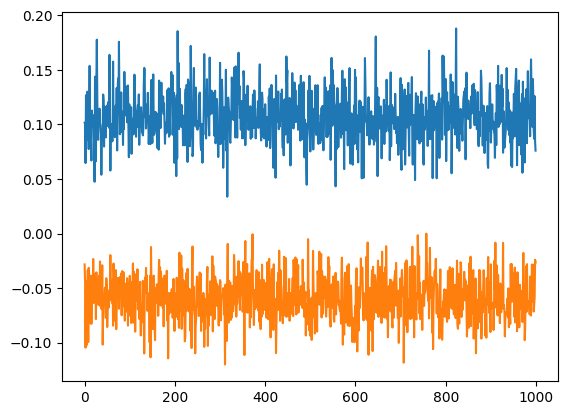

In [27]:
plt.plot(output.detach().cpu())

#### Comparando tempo de computacao CPU vs GPU

In [ ]:
# Compute CPU time

init = time.process_time()
device = 'cpu'
neural_net.to(device)
data = data.to(device)
labels = labels.to(device)
output = neural_net(data).detach().cpu()

cpu_time = 1000 * (time.process_time() - init)

In [ ]:
# Compute GPU time
init = time.process_time()
device = 'cuda:0'
neural_net.to(device)
data = data.to(device)
labels = labels.to(device)
output = neural_net(data).detach().cpu()

gpu_time = 1000 * (time.process_time() - init)

In [33]:
print(f'Time in ms: {[cpu_time,gpu_time]}')

Time in ms: [99.30084499999924, 11.151026000000286]


#### Criando Rede Neural na CPU e comparando

In [41]:
neural_net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
).cpu()

data = torch.randn((1000,20))

start = time.process_time()
output = neural_net(data).detach()
cpu_time2 = 1000 * (time.process_time() - start)


In [42]:
print(f'Time in ms: {[cpu_time2, cpu_time, gpu_time]}')

Time in ms: [12.169196000000326, 99.30084499999924, 11.151026000000286]
